In [127]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import helper

from statsmodels.stats.outliers_influence import variance_inflation_factor

import missingno as msno

import datetime as datetime

In [2]:
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [3]:
## load target
main_frame = pd.read_csv('cleaned_data/long_interpolated_target.csv', index_col=0, parse_dates=['Time'])


## ACS
acs = pd.read_csv('cleaned_data/acs_clean.csv', index_col=0, parse_dates=['Time'])
acs2 = pd.read_csv('cleaned_data/acs2_clean.csv', index_col=0, parse_dates=['Time'])

In [4]:
main_frame = helper.time_lag_merge(main_frame, acs)
main_frame = helper.time_lag_merge(main_frame, acs2)

<AxesSubplot:>

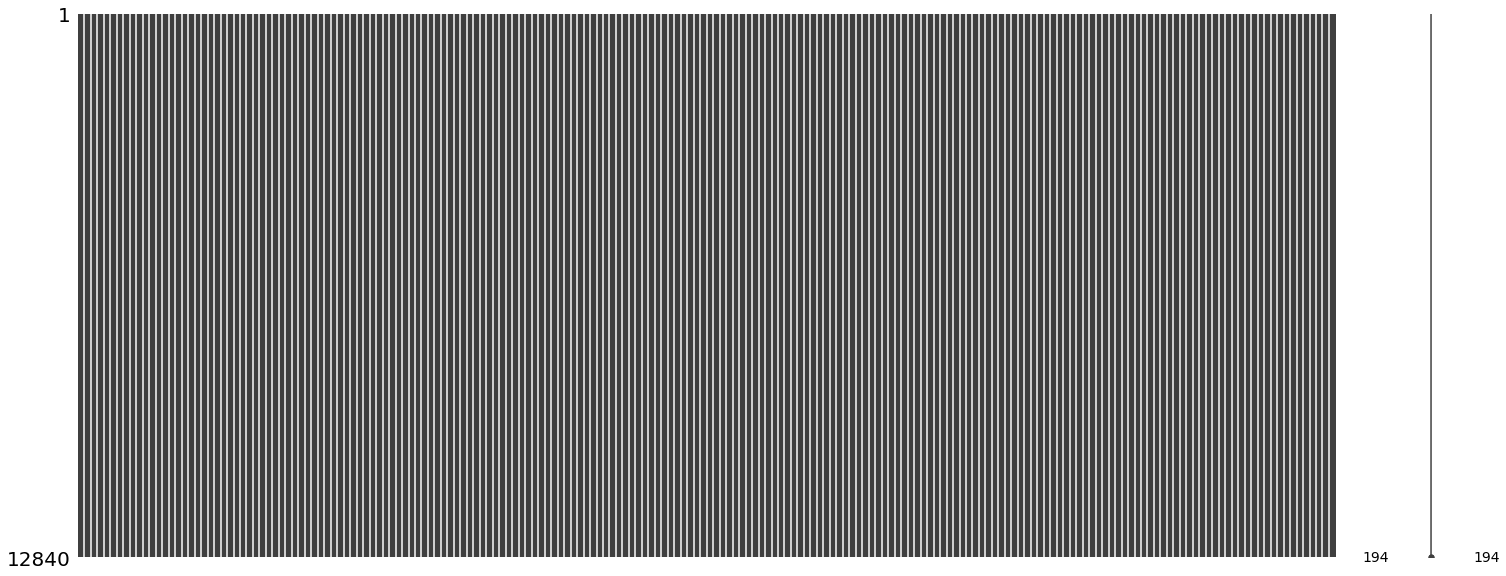

In [5]:
main_frame = main_frame.sort_values('Time')
main_frame = main_frame.dropna()
msno.matrix(main_frame)

In [6]:
main_frame = main_frame.drop(columns=['Time', 'zip_code', 'zori_ssa'], axis=1)

In [7]:
## Scale all variables
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(main_frame), columns=list(main_frame.columns))


In [8]:
# initialize X with all variables
X_reduced = X.copy()

cnt = 1
# Run vif with max 10
vif_frame = calc_vif(X_reduced).sort_values('VIF', ascending=False).reset_index()
while (vif_frame.loc[0,'VIF'] > 5):
    print(f"run: {cnt}, shape: {X_reduced.shape}, dropping: {vif_frame.loc[0,'variables']}")
    X_reduced = X_reduced.drop(vif_frame.loc[0,'variables'], axis=1)
    vif_frame = calc_vif(X_reduced).sort_values('VIF', ascending=False).reset_index()
    cnt += 1
vif10_list = vif_frame['variables'].to_list()
X_vif10 = X_reduced

/Users/julie/opt/anaconda3/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
/Users/julie/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1717: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


run: 1, shape: (12840, 191), dropping: male_pop
run: 2, shape: (12840, 190), dropping: female_pop
run: 3, shape: (12840, 189), dropping: median_age
run: 4, shape: (12840, 188), dropping: housing_units_other_type_rented
run: 5, shape: (12840, 187), dropping: housing_units_over_50_units_rented
run: 6, shape: (12840, 186), dropping: education_population
run: 7, shape: (12840, 185), dropping: housing_units_10_to_19_units_owned
run: 8, shape: (12840, 184), dropping: married_men
run: 9, shape: (12840, 183), dropping: housing_units_single_family_attached
run: 10, shape: (12840, 182), dropping: median_contract_rent
run: 11, shape: (12840, 181), dropping: single_men
run: 12, shape: (12840, 180), dropping: employed_pop
run: 13, shape: (12840, 179), dropping: bicycle_population
run: 14, shape: (12840, 178), dropping: median_gross_rent
run: 15, shape: (12840, 177), dropping: commuters_by_public_transportation
run: 16, shape: (12840, 176), dropping: total_population_in_renter_occupied_units
run: 17

run: 135, shape: (12840, 57), dropping: male_67_to_69
run: 136, shape: (12840, 56), dropping: female_80_to_84
run: 137, shape: (12840, 55), dropping: average_household_size_owners
run: 138, shape: (12840, 54), dropping: women_with_professional_degree


In [14]:
# X_vif10.to_csv('vif_10.csv')

In [15]:
vif10_list

# 'top_5_percent_lower_limit',
#  'housing_units_20_to_49_units_rented',
#  'married_men_spouse_absent',
#  'widowed_men',
#  'renter_occupied_housing_units_paying_cash_median_gross_rent',
#  'housing_units_mobile_home_owned',
#  'male_70_to_74',
#  'men_with_less_one_year_college',
#  'male_85_over',
#  'housing_units_mobile_home_rented',
#  'median_age_right',
#  'female_85_over',
#  'quintile_1_income_share',
#  'male_60_to_61',
#  'housing_units_built_1940_to_1949',
#  'average_household_size_renters',
#  'housing_units_built_1990_to_1999',
#  'male_75_to_79',
#  'housing_units_built_1980_to_1989',
#  'male_21',
#  'walking_to_work_population',
#  'housing_units_3_to_4_units_rented',
#  'male_80_to_84',
#  'vacant_housing_units_for_rent',
#  'housing_units_built_1930_to_1939',
#  'asian_pop',
#  'housing_units_duplex_rented',
#  'working_from_home_population',
#  'housing_units_built_1950_to_1959',
#  'housing_units_5_to_9_units_owned',
#  'women_with_doctoral_degree',
#  'housing_units_20_to_49_units_owned',
#  'housing_units_other_type_owned',
#  'housing_units_other_type',
#  'percent_income_spent_on_rent',
#  'housing_units_over_50_units_owned',
#  'transit_population',
#  'housing_units_single_family_attached_rented',
#  'housing_units_single_family_attached_owned',
#  'housing_units_duplex_owned',
#  'quintile_4_income_share',
#  'male_male_households',
#  'black_pop',
#  'other_commute_method_population',
#  'housing_units_3_to_4_units_owned',
#  'female_female_households',
#  'armed_forces',
#  'motorcycle_population',
#  'amerindian_pop',
#  'taxi_population',
#  'other_race_pop',
#  'year',
#  'bachelors_degree'

['top_5_percent_lower_limit',
 'housing_units_20_to_49_units_rented',
 'married_men_spouse_absent',
 'widowed_men',
 'renter_occupied_housing_units_paying_cash_median_gross_rent',
 'housing_units_mobile_home_owned',
 'male_70_to_74',
 'men_with_less_one_year_college',
 'male_85_over',
 'housing_units_mobile_home_rented',
 'median_age_right',
 'female_85_over',
 'quintile_1_income_share',
 'male_60_to_61',
 'housing_units_built_1940_to_1949',
 'average_household_size_renters',
 'housing_units_built_1990_to_1999',
 'male_75_to_79',
 'housing_units_built_1980_to_1989',
 'male_21',
 'walking_to_work_population',
 'housing_units_3_to_4_units_rented',
 'male_80_to_84',
 'vacant_housing_units_for_rent',
 'housing_units_built_1930_to_1939',
 'asian_pop',
 'housing_units_duplex_rented',
 'working_from_home_population',
 'housing_units_built_1950_to_1959',
 'housing_units_5_to_9_units_owned',
 'women_with_doctoral_degree',
 'housing_units_20_to_49_units_owned',
 'housing_units_other_type_owned',

In [12]:
vif5_list


# ['top_5_percent_lower_limit',
#  'housing_units_20_to_49_units_rented',
#  'married_men_spouse_absent',
#  'widowed_men',
#  'renter_occupied_housing_units_paying_cash_median_gross_rent',
#  'housing_units_mobile_home_owned',
#  'male_70_to_74',
#  'men_with_less_one_year_college',
#  'male_85_over',
#  'housing_units_mobile_home_rented',
#  'median_age_right',
#  'female_85_over',
#  'quintile_1_income_share',
#  'male_60_to_61',
#  'housing_units_built_1940_to_1949',
#  'average_household_size_renters',
#  'housing_units_built_1990_to_1999',
#  'male_75_to_79',
#  'housing_units_built_1980_to_1989',
#  'male_21',
#  'walking_to_work_population',
#  'housing_units_3_to_4_units_rented',
#  'male_80_to_84',
#  'vacant_housing_units_for_rent',
#  'housing_units_built_1930_to_1939',
#  'asian_pop',
#  'housing_units_duplex_rented',
#  'working_from_home_population',
#  'housing_units_built_1950_to_1959',
#  'housing_units_5_to_9_units_owned',
#  'women_with_doctoral_degree',
#  'housing_units_20_to_49_units_owned',
#  'housing_units_other_type_owned',
#  'housing_units_other_type',
#  'percent_income_spent_on_rent',
#  'housing_units_over_50_units_owned',
#  'transit_population',
#  'housing_units_single_family_attached_rented',
#  'housing_units_single_family_attached_owned',
#  'housing_units_duplex_owned',
#  'quintile_4_income_share',
#  'male_male_households',
#  'black_pop',
#  'other_commute_method_population',
#  'housing_units_3_to_4_units_owned',
#  'female_female_households',
#  'armed_forces',
#  'motorcycle_population',
#  'amerindian_pop',
#  'taxi_population',
#  'other_race_pop',
#  'year',
#  'bachelors_degree']

NameError: name 'vif5_list' is not defined

In [18]:
vif5 = pd.read_csv('vif_5.csv', index_col=0)

In [27]:
all_vars = pd.read_csv('all_vars2.csv', index_col=0)
# all_vars

,Time,zip_code,zori_ssa,mintempC,maxtempC,precipMM,env_violation_count,num_daycare_permit,daycare_childcare_subsidies,daycare_corrective_action,...,housing_units_over_50_units,women_with_bachelors_degree,male_45_to_49,housing_units_built_1960_to_1969,housing_units_duplex_owned,married_women_spouse_present,men_with_hs_diploma,quintile_5_mean_income,quintile_2_mean_income,male_75_to_79
0,2014-01-01,77494,1390.0,5.870968,15.064516,1.009677,11.0,2.0,2.0,0.0,...,506.0,9997.0,3109.0,0.0,0.0,19112.0,1407.0,303338.0,91207.0,250.0
5612,2014-01-01,77386,1427.0,5.870968,15.064516,1.009677,0.0,0.0,0.0,0.0,...,81.0,3999.0,1559.0,494.0,0.0,9505.0,2334.0,226683.0,60437.0,102.0
14076,2014-01-01,78634,1087.0,3.451613,14.870968,0.283871,0.0,0.0,0.0,0.0,...,74.0,1575.0,916.0,15.0,0.0,5467.0,1909.0,170483.0,52364.0,180.0
2208,2014-01-01,75056,1121.0,1.935484,11.806452,1.151613,0.0,0.0,0.0,0.0,...,1260.0,4588.0,2291.0,355.0,0.0,10097.0,3117.0,247312.0,51963.0,105.0
10304,2014-01-01,76021,1173.0,1.935484,11.806452,1.151613,0.0,0.0,0.0,0.0,...,1023.0,3637.0,1147.0,745.0,0.0,7399.0,2158.0,187176.0,39290.0,397.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3188,2018-12-01,75150,1392.0,7.322581,13.419355,5.377419,0.0,0.0,0.0,0.0,...,1588.0,2455.0,1804.0,3240.0,27.0,8682.0,5376.0,146516.0,34813.0,409.0
16436,2018-12-01,75240,1379.0,7.322581,13.419355,5.377419,0.0,0.0,0.0,0.0,...,2113.0,1780.0,834.0,3002.0,14.0,3450.0,1674.0,186706.0,31067.0,160.0
17724,2018-12-01,76134,1454.0,7.322581,13.419355,5.377419,0.0,0.0,0.0,0.0,...,414.0,727.0,929.0,1510.0,0.0,3847.0,2821.0,145712.0,28214.0,223.0
13952,2018-12-01,78705,1628.0,7.903226,15.838710,4.425806,0.0,0.0,0.0,0.0,...,3826.0,1550.0,169.0,1123.0,64.0,909.0,174.0,156992.0,7149.0,36.0


<AxesSubplot:>

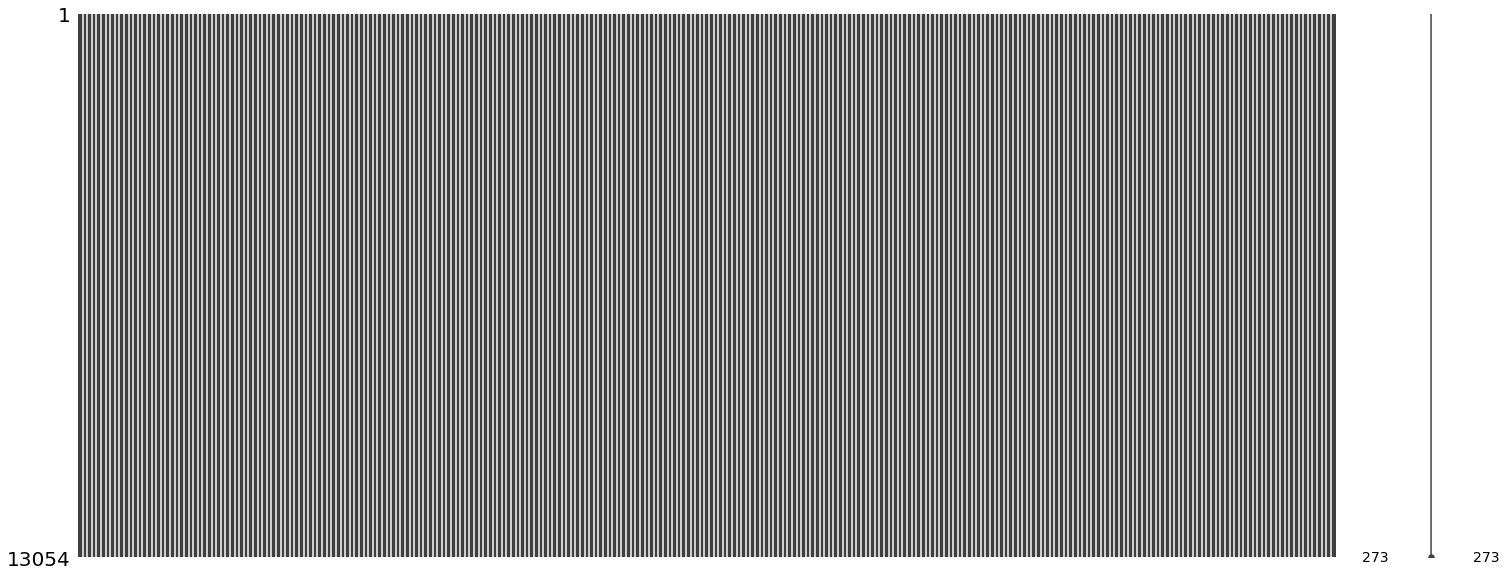

In [28]:
msno.matrix(all_vars)

In [82]:
vif5_variables = vif5['variables'].to_list()


### Now linear model using VIF

In [159]:
acs_vif5 = [x for x in acs_cols if x in vif5_variables]
acs_vif10 = [x for x in acs_cols if x in vif10_list]
acs2_vif5 = [x for x in acs2_cols if x in vif5_variables]
acs2_vif10 = [x for x in acs2_cols if x in vif10_list]

In [160]:
## load target
main_frame = pd.read_csv('cleaned_data/long_interpolated_target.csv', index_col=0, parse_dates=['Time'])

## ACS
acs = pd.read_csv('cleaned_data/acs_clean.csv', index_col=0, parse_dates=['Time'])
acs2 = pd.read_csv('cleaned_data/acs2_clean.csv', index_col=0, parse_dates=['Time'])

## VIF5
acs_vif5.extend(['Time', 'zip_code'])
acs = acs[acs_vif5]
acs2_vif5.extend(['Time', 'zip_code'])
acs2 = acs2[acs2_vif5]

## Merge all the data

acs_cols = acs.drop(columns=['Time','zip_code']).columns.to_list()
acs2_cols = acs2.drop(columns=['Time','zip_code']).columns.to_list()
# merged_frame = helper.time_lag_merge(main_frame, acs, {32:acs_cols})
# merged_frame = helper.time_lag_merge(merged_frame, acs2, {19:acs2_cols})
merged_frame = helper.time_lag_merge(main_frame, acs, {32:acs_cols})
merged_frame = helper.time_lag_merge(merged_frame, acs2, {20:acs2_cols})


date_range = str(merged_frame['Time'].dt.date.min()) + ' to ' +str(merged_frame['Time'].dt.date.max())
date_range

'2014-01-01 to 2021-07-01'

<AxesSubplot:>

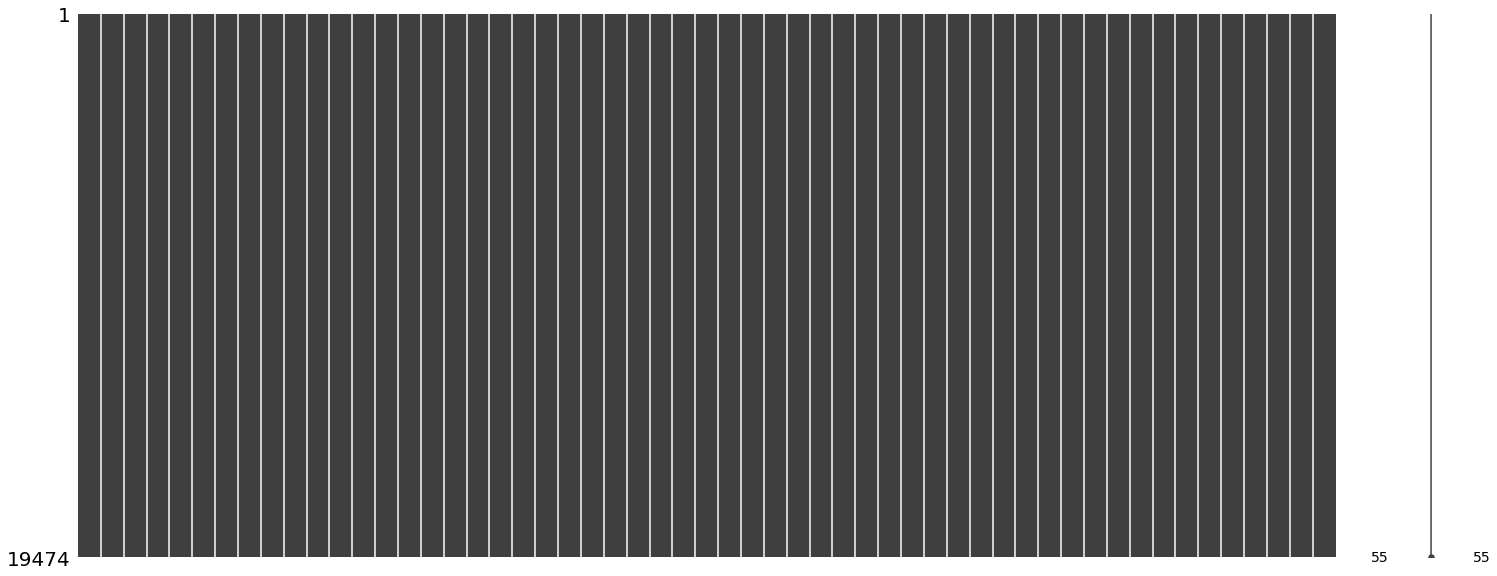

In [161]:
# drop missing zip code
merged_frame = merged_frame.dropna()
msno.matrix(merged_frame)

In [162]:

train_test_date = datetime.datetime(2017,12,1)

## Cut off dates before earliest date and after lastest one
print(f'original: {merged_frame.shape}')
train = merged_frame[merged_frame['Time'] < train_test_date]
print(f'train: {train.shape}')
test = merged_frame[merged_frame['Time'] > train_test_date]
print(f'test: {test.shape}')

original: (19474, 55)
train: (10058, 55)
test: (9202, 55)


In [163]:
y_test = test['zori_ssa']
x_test = test.drop(columns=['Time', 'zip_code', 'zori_ssa'])

y_train = train['zori_ssa']
x_train = train.drop(columns=['Time', 'zip_code', 'zori_ssa'])


In [164]:
# numerical_features = test.select_dtypes(['datetime','float64', 'int64'])
# numerical_features = numerical_features.drop(['Time', 'zip_code'], axis=1)

# numerical_features = numerical_features.dropna(axis='index')

In [165]:
# merged_frame.drop('zip_code', axis=1)
## Scale all variables
scaler = StandardScaler()
train = pd.DataFrame(scaler.fit_transform(x_train), columns=list(x_train.columns))

x_test = pd.DataFrame(scaler.transform(x_test), columns=list(x_train.columns))


### Lasso model - VIF5

In [169]:
lr = LinearRegression()
lr.fit(x_train, y_train)
print(f'train score: {lr.score(x_train,y_train)}')
print(f'test score: {lr.score(x_test,y_test)}')
# lr.coef_

train score: 0.6502742872298795
test score: -62922.53160993239


array([ 6.76336211e-03, -2.18639480e-03,  3.98416787e-03, -1.08767130e-01,
        2.64114998e-01, -1.38948814e-01, -3.11982815e-01, -2.35564403e-01,
       -5.81015361e+00, -5.31857197e-12, -1.51112623e-01,  3.04659936e+01,
       -6.14050322e-03,  4.61784364e-01, -9.30716376e-02,  4.11696182e-02,
        4.21098421e-01, -1.11555255e+00,  8.14613143e-03,  4.15759754e-02,
       -1.98189786e-01, -4.10365974e+00, -1.30497708e-01, -8.21812270e-02,
        5.09727081e-01,  1.56734126e-02,  4.24501762e-02,  3.88841852e-04,
       -1.58846276e-01, -1.56927781e+00,  5.91023202e-01, -6.41118211e-03,
        1.12136139e-03,  3.71292832e-02, -6.77748388e-02,  2.15945983e-02,
       -7.46709420e-02, -9.14843204e-02,  2.38554430e-01, -1.15426739e-01,
        3.50118630e-02, -4.63914238e+00,  1.60855695e-02, -2.42427381e-01,
        1.86005149e-01, -1.89965543e-01,  2.30155712e-02,  5.52113052e-02,
        1.62370607e-02,  6.21883279e-02,  4.50004071e-01, -5.20981414e-02])

In [176]:
las = Lasso()
las = Lasso(max_iter = 50000, random_state = 33, alpha=0.0001)
las.fit(x_train,y_train)
print(f'train score: {las.score(x_train,y_train)}')
print(f'test score: {las.score(x_test,y_test)}')
# las.coef_

train score: 0.6502742872268854
test score: -62922.176353083305


array([ 6.76335866e-03, -2.18641109e-03,  3.98427703e-03, -1.08767555e-01,
        2.64114159e-01, -1.38948602e-01, -3.11983819e-01, -2.35564229e-01,
       -5.81016157e+00,  0.00000000e+00, -1.51112795e-01,  3.04659037e+01,
       -6.14039834e-03,  4.61784964e-01, -9.30717136e-02,  4.11695991e-02,
        4.21098753e-01, -1.11417504e+00,  8.14610833e-03,  4.15754974e-02,
       -1.98189374e-01, -4.10354813e+00, -1.30497142e-01, -8.21809122e-02,
        5.09725881e-01,  1.56733488e-02,  4.24504119e-02,  3.88882991e-04,
       -1.58848274e-01, -1.56927398e+00,  5.91023828e-01, -6.41110353e-03,
        1.12136890e-03,  3.71291960e-02, -6.77751874e-02,  2.15946713e-02,
       -7.46712728e-02, -9.14843764e-02,  2.38554885e-01, -1.15426791e-01,
        3.50119001e-02, -4.63905567e+00,  1.60856091e-02, -2.42427428e-01,
        1.86006233e-01, -1.89965603e-01,  2.30158994e-02,  5.52108909e-02,
        1.62371015e-02,  6.21884917e-02,  4.50004227e-01, -5.20978260e-02])

In [177]:
coef_table = pd.DataFrame({'Feature':X.columns, 'Coef':las.coef_, 'AbsVal':np.abs(las.coef_)})
coef_table = coef_table.sort_values('AbsVal', ascending=False)
top30 = coef_table.head(30)
# top30

ValueError: All arrays must be of the same length